## Logistic Regression Model
This model has been created to help classify between default and non-default individuals. This model will be saved and used to take user input to predict their default status

#### Importing Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import matplotlib.pyplot as plt

#### Import data

In [2]:
data=pd.read_csv('.\\Data_USD.csv')
data.head(5)
#profile=pandas_profiling.ProfileReport(data)
#profile.to_file(outputfile="my.html")

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
0,725.714286,2,2,1,24,-0.33,46.590857,4.166810,0.09,0.195650,1
1,4354.285714,2,2,2,26,0.50,103.275191,30.238095,0.29,0.022350,1
2,3265.714286,2,2,2,34,0.00,614.758619,66.632667,0.11,0.324878,0
3,1814.285714,2,2,1,37,0.00,1399.019905,50.727429,0.04,0.939800,0
4,1814.285714,1,2,1,57,-0.33,661.240619,357.105857,0.54,0.172340,0


#### Assigning data to X and y 

In [3]:
X = data.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values

In [4]:
X

array([[ 7.25714286e+02,  2.00000000e+00,  2.00000000e+00, ...,
         4.16680952e+00,  9.00000000e-02,  1.95650000e-01],
       [ 4.35428571e+03,  2.00000000e+00,  2.00000000e+00, ...,
         3.02380952e+01,  2.90000000e-01,  2.23500000e-02],
       [ 3.26571429e+03,  2.00000000e+00,  2.00000000e+00, ...,
         6.66326667e+01,  1.10000000e-01,  3.24877778e-01],
       ...,
       [ 1.08857143e+03,  1.00000000e+00,  2.00000000e+00, ...,
         1.89290476e+02,  4.40000000e-01,  1.18833333e-01],
       [ 2.90285714e+03,  1.00000000e+00,  3.00000000e+00, ...,
         8.90094619e+02,  5.50000000e-01, -2.05625000e-02],
       [ 1.81428571e+03,  1.00000000e+00,  2.00000000e+00, ...,
         5.02436190e+01,  4.00000000e-02,  9.58580000e-01]])

In [5]:
y = data['DEFAULT_PAYMENT_NEXT_MO'].values.reshape(-1, 1)
print(X.shape)
print(y.shape)

(30000, 10)
(30000, 1)


In [ ]:
#y.reshape(1, -1)

#### Splitting data for testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.5)

In [7]:
X_train.shape

(21000, 10)

In [8]:
X_train

array([[ 8.70857143e+03,  2.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.81428571e+03,  2.00000000e+00,  1.00000000e+00, ...,
         1.39814905e+02,  9.80000000e-01,  6.86000000e-02],
       [ 1.81428571e+03,  2.00000000e+00,  2.00000000e+00, ...,
         6.17099048e+01,  4.00000000e-02,  9.24060000e-01],
       ...,
       [ 1.81428571e+03,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.54000000e+03,  2.00000000e+00,  2.00000000e+00, ...,
         7.19666667e+01,  4.00000000e-02,  1.05627143e+00],
       [ 5.80571429e+03,  2.00000000e+00,  2.00000000e+00, ...,
         1.46019762e+02,  1.08000000e+00, -1.25000000e-04]])

#### Processing data with StandardScaler

In [9]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
X_train_scaled

array([[ 0.56391448,  0.80648893, -1.07681763, ..., -0.49741723,
         0.09035743, -1.02549459],
       [-0.90610925,  0.80648893, -1.07681763, ..., -0.13590122,
         0.08737206, -0.85894506],
       [-0.90610925,  0.80648893,  0.18648797, ..., -0.33785543,
        -0.05294013,  1.2179713 ],
       ...,
       [-0.90610925, -1.23994262, -1.07681763, ..., -0.49741723,
         0.09035743, -1.02549459],
       [-0.75136991,  0.80648893,  0.18648797, ..., -0.31133477,
        -0.05294013,  1.53895893],
       [-0.05504288,  0.80648893,  0.18648797, ..., -0.11985747,
         0.10229889, -1.02579807]])

In [11]:
y_test_scaled

array([[-0.53520968],
       [-0.53520968],
       [-0.53520968],
       ...,
       [-0.53520968],
       [-0.53520968],
       [-0.53520968]])

#### Creating logistic regression model


In [12]:
classifier = LogisticRegression()
classifier

LogisticRegression()

#### Fitting the model

In [13]:
classifier.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [14]:
print(X)

[[ 7.25714286e+02  2.00000000e+00  2.00000000e+00 ...  4.16680952e+00
   9.00000000e-02  1.95650000e-01]
 [ 4.35428571e+03  2.00000000e+00  2.00000000e+00 ...  3.02380952e+01
   2.90000000e-01  2.23500000e-02]
 [ 3.26571429e+03  2.00000000e+00  2.00000000e+00 ...  6.66326667e+01
   1.10000000e-01  3.24877778e-01]
 ...
 [ 1.08857143e+03  1.00000000e+00  2.00000000e+00 ...  1.89290476e+02
   4.40000000e-01  1.18833333e-01]
 [ 2.90285714e+03  1.00000000e+00  3.00000000e+00 ...  8.90094619e+02
   5.50000000e-01 -2.05625000e-02]
 [ 1.81428571e+03  1.00000000e+00  2.00000000e+00 ...  5.02436190e+01
   4.00000000e-02  9.58580000e-01]]


#### Checking the scores

In [15]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7974761904761904
Testing Data Score: 0.7974444444444444


#### Making predictions

In [16]:
y_test.shape

(9000, 1)

In [17]:
y_prediction = classifier.predict(X_test)
print("Recall score: "+ str(recall_score(y_test, y_prediction)))

Recall score: 0.14846938775510204


In [18]:
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Classification Report

In [20]:
print(classification_report(y_test, y_prediction,
                            target_names=["default", "non_default"]))

              precision    recall  f1-score   support

     default       0.80      0.98      0.88      7040
 non_default       0.65      0.15      0.24      1960

    accuracy                           0.80      9000
   macro avg       0.73      0.56      0.56      9000
weighted avg       0.77      0.80      0.74      9000



#### Plotting Confusion Matrix

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    


Confusion matrix, without normalization
[[6886  154]
 [1669  291]]


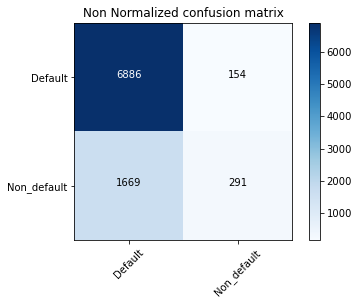

In [22]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_default', 'Default'], normalize=False,
                      title='Non Normalized confusion matrix')

Normalized confusion matrix
[[0.978125   0.021875  ]
 [0.85153061 0.14846939]]


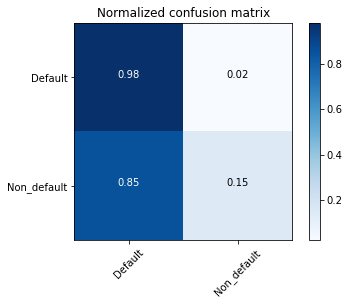

In [23]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Default', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')


#### Saving Model

In [ ]:
filename = 'logistic_regression_model.sav'
pickle.dump(classifier, open(filename, 'wb'))